In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv('NSE-TATAGLOBAL.csv')
print('Data Loaded')

Data Loaded


In [ ]:
data_train

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
# prepare sequential data
# open col..
data_train.shape

(2035, 8)

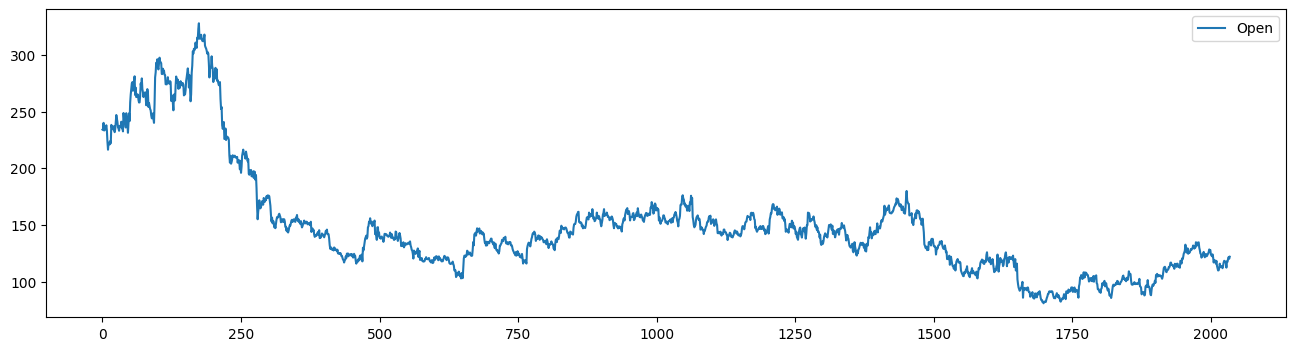

In [4]:
# Open data
data_train['Open'].plot(figsize=(16,4),legend=True)
plt.show()

In [5]:
# prepare the training data
training_set=data_train.iloc[:,1:2].values

In [ ]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [6]:
# scale 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [ ]:
Since LSTM store long term memory state, we create a data structure with 60 timestampsand 1 output
To prepare training data - prepare sequence

timestamp=3

120 130 125 140 150 155 170 180
Input                 output
120  130 125           140
130  125 140           150
125  140 150           155
140  150 155          170
150 155 170           180
155 170 180           ?????

8---5 sequences

three dim data
(5,3,1)  First dim- number of seq, sec dim- timestamp, number of op

In [ ]:
2035-60

1975

In [ ]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [8]:
# prepare the data timestamp 60
X_train=[]
y_train=[]
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0]) # 0:60,0
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


In [9]:
X_train.shape

(1975, 60)

In [ ]:
X_train[0]

array([0.6202352 , 0.62226277, 0.64436334, 0.61719384, 0.61820762,
       0.62408759, 0.62793998, 0.63584753, 0.61658556, 0.57725061,
       0.54845904, 0.57339822, 0.57339822, 0.56731549, 0.57948094,
       0.57137064, 0.63706407, 0.62814274, 0.63219789, 0.62550689,
       0.61942417, 0.63219789, 0.61111111, 0.62206002, 0.64557989,
       0.67234388, 0.66058394, 0.64760746, 0.6283455 , 0.62408759,
       0.61597729, 0.63341444, 0.63077859, 0.63321168, 0.64841849,
       0.62469586, 0.62814274, 0.61394972, 0.67964315, 0.65815085,
       0.6593674 , 0.64841849, 0.62773723, 0.67883212, 0.66058394,
       0.63990268, 0.60888078, 0.6431468 , 0.6784266 , 0.65064882,
       0.71695053, 0.74574209, 0.7676399 , 0.78548256, 0.78994323,
       0.75892133, 0.76520681, 0.79622871, 0.81062449, 0.74371452])

In [ ]:
y_train[0]

0.7700729927007299

In [ ]:
X_train.shape

(1975, 60)

In [10]:
# convert into 3 dim
# reshape
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train.shape

(1975, 60, 1)

In [11]:
# Build the LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [12]:
# create the architecture
model=Sequential()
# first LSTM layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
# ADD second LSTM layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
# ADD third LSTM layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
# ADD fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# add final output layer
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [13]:
# model compile
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
# run the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 17s 139ms/step - loss: 0.0108
Epoch 2/50
62/62 [==============================] - 8s 128ms/step - loss: 0.0044
Epoch 3/50
62/62 [==============================] - 8s 126ms/step - loss: 0.0027
Epoch 4/50
62/62 [==============================] - 9s 138ms/step - loss: 0.0026
Epoch 5/50
62/62 [==============================] - 7s 119ms/step - loss: 0.0028
Epoch 6/50
62/62 [==============================] - 9s 139ms/step - loss: 0.0024
Epoch 7/50
62/62 [==============================] - 9s 140ms/step - loss: 0.0023
Epoch 8/50
62/62 [==============================] - 7s 120ms/step - loss: 0.0024
Epoch 9/50
62/62 [==============================] - 9s 140ms/step - loss: 0.0021
Epoch 10/50
62/62 [==============================] - 8s 131ms/step - loss: 0.0018
Epoch 11/50
62/62 [==============================] - 8s 126ms/step - loss: 0.0019
Epoch 12/50
62/62 [==============================] - 10s 161ms/step - loss: 0.0017
Epoch 13/50
62/62 [====

In [15]:
# to prepare the test data
model.save('Stock_pred.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Load the model
from tensorflow.keras.models import load_model

In [17]:
model=load_model('Stock_pred.h5')
print('model loaded')

model loaded


In [18]:
# load the test data
dataset_test=pd.read_csv('tatatest.csv')

In [19]:
dataset_test.shape

(16, 8)

In [20]:
dataset_test

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,2018-10-16,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,2018-10-15,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,2018-10-12,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,2018-10-11,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,2018-10-10,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


In [21]:
test_set=dataset_test.iloc[:,1:2].values

In [22]:
test_set

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [23]:
# concat training & test data
dataset_total=pd.concat((data_train['Open'],dataset_test['Open']),axis=0)

In [24]:
dataset_total.shape

(2051,)

In [ ]:
len(dataset_total)-len(dataset_test)-60

1975

In [ ]:
2051-1975

76

In [ ]:
a=a.reshape(-1,1)

In [25]:
# prepare the test data
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,76):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [26]:
X_test.shape

(16, 60, 1)

In [27]:
# do the prediction
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


In [28]:
predicted_stock_price

array([[120.30696],
       [135.42581],
       [163.42845],
       [192.55132],
       [212.35362],
       [222.08316],
       [224.40094],
       [221.6038 ],
       [216.58086],
       [210.34311],
       [205.08894],
       [202.39165],
       [201.11238],
       [202.16559],
       [205.93207],
       [211.75235]], dtype=float32)

In [ ]:
test_set

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

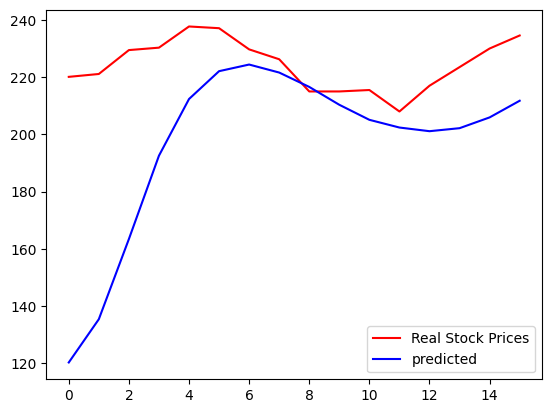

In [29]:
# visualize the result
plt.plot(test_set,label='Real Stock Prices',color='red')
plt.plot(predicted_stock_price,color='blue',label='predicted')
plt.legend()
plt.show()